In [48]:
import pandas as pd
import numpy as np
import seaborn as sns

In [152]:
df = pd.read_csv('../data/spotify.csv', index_col=0)

In [97]:
df['date']= pd.to_datetime(df['date'])
df['date'] = df["date"].round('1h')
df = df.join(pd.get_dummies(df["station"]))

In [177]:
df["dayhour"] = df["date"].apply(lambda x: x.weekday()*24 + x.hour)
df["hour"] = df["date"].apply(lambda x: x.hour)
df["day"] = df["date"].apply(lambda x: x.weekday())

In [196]:
df.columns

Index(['name', 'station', 'date', 'artist', 'song', 'uri', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness',
       'tempo', 'valence', 'loudness', 'index', 'spotify_artist',
       'spotify_song', 'scraped_artist', 'scraped_song', 'fm4', 'kronehit',
       'oe3', 'radiowien', 'day', 'dayhour', 'hour'],
      dtype='object')

In [210]:
feature = "liveness"

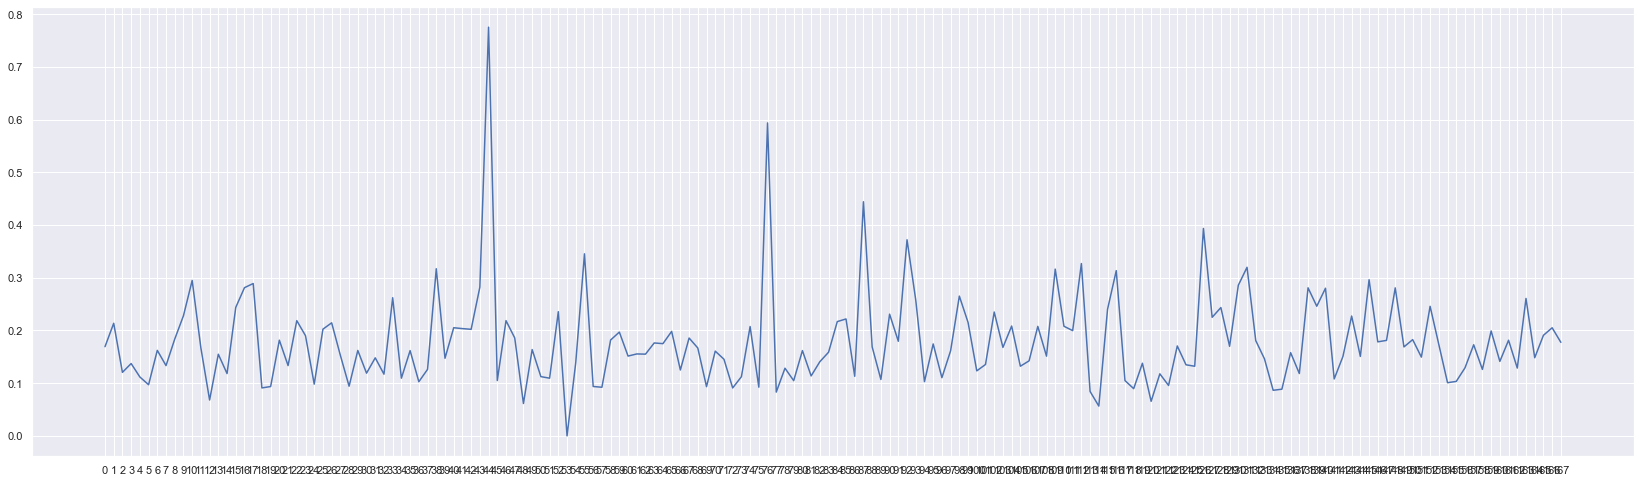

In [211]:
dayhour()

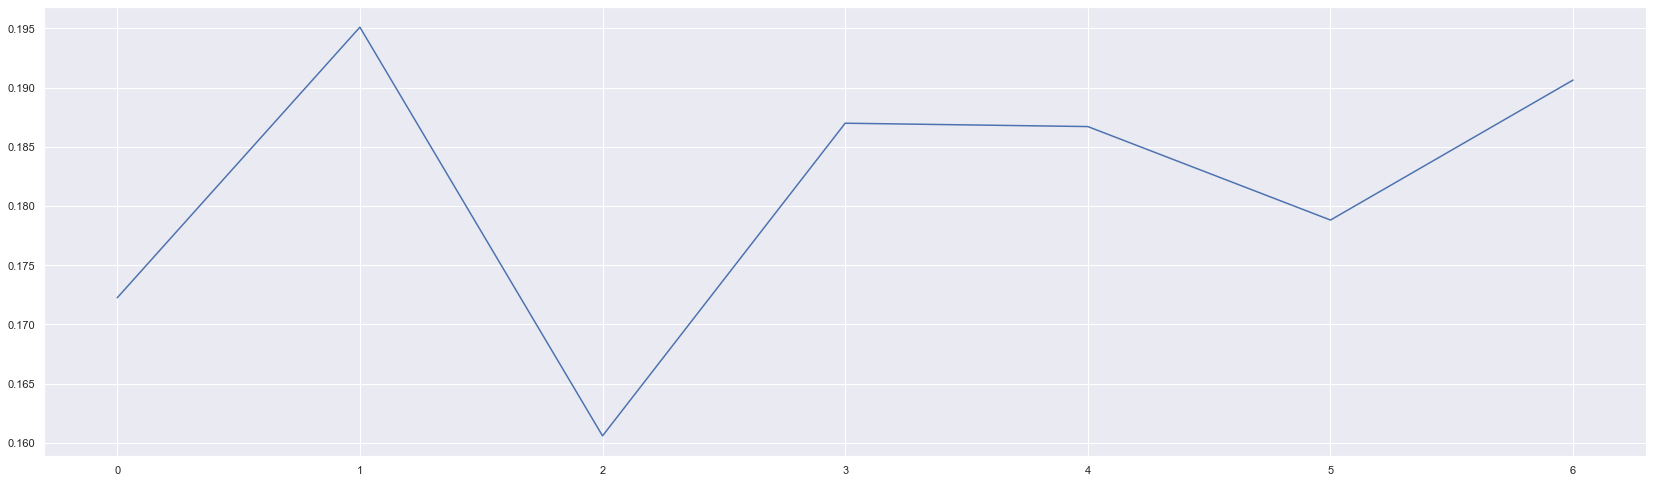

In [212]:
day()

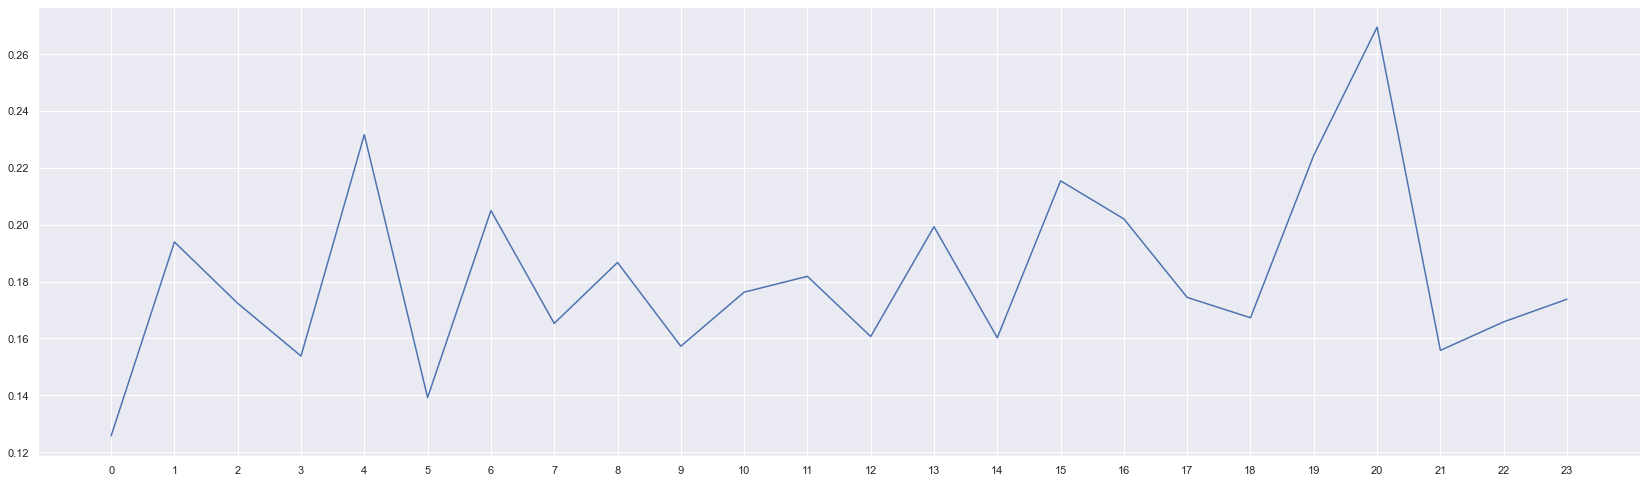

In [213]:
hour()

In [188]:
def dayhour():
    dayhour = {"values": {}, "index": {}, "count": {}}

    for i in range(24*7):
        dayhour["values"][str(i)] = 0
        dayhour["index"][str(i)] = str(i)
        dayhour["count"][str(i)] = 0

    for index, row in df.iterrows():
        if row["oe3"] == 1:
            dayhour["values"][str(row["dayhour"])] += row[feature]
            dayhour["count"][str(row["dayhour"])] += 1
    for day in range(24*7):
        if dayhour["count"][str(day)] == 0:
            continue
        dayhour["values"][str(day)] = dayhour["values"][str(day)] / dayhour["count"][str(day)]

    sns.set(rc={'figure.figsize':(28.7,8.27)})
    sns.lineplot(x=dayhour["index"], y=dayhour["values"])

In [189]:
def hour():
    hour = {"values": {}, "index": {}, "count": {}}

    for i in range(24):
        hour["values"][str(i)] = 0
        hour["index"][str(i)] = str(i)
        hour["count"][str(i)] = 0

    for index, row in df.iterrows():
        if row["oe3"] == 1:
            hour["values"][str(row["hour"])] += row[feature]
            hour["count"][str(row["hour"])] += 1
    for day in range(24):
        if hour["count"][str(day)] == 0:
            continue
        hour["values"][str(day)] = hour["values"][str(day)] / hour["count"][str(day)]

    sns.set(rc={'figure.figsize':(28.7,8.27)})
    sns.lineplot(x=hour["index"], y=hour["values"])

In [190]:
def day():
    day = {"values": {}, "index": {}, "count": {}}

    for i in range(7):
        day["values"][str(i)] = 0
        day["index"][str(i)] = str(i)
        day["count"][str(i)] = 0

    for index, row in df.iterrows():
        if row["oe3"] == 1:
            day["values"][str(row["day"])] += row[feature]
            day["count"][str(row["day"])] += 1
    for i in range(7):
        if day["count"][str(i)] == 0:
            continue
        day["values"][str(i)] = day["values"][str(i)] / day["count"][str(i)]

    sns.set(rc={'figure.figsize':(28.7,8.27)})
    sns.lineplot(x=day["index"], y=day["values"])